In [1]:
%config IPCompleter.greedy=True

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures


import plotly.express as px
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import r2_score

In [3]:
data=pd.read_csv('data\data.csv')
data.head()

,Unnamed: 0,Глубина_м,Нагрузка_на_долото_тонн,Скорость_ротора,Плотность_на_входе_кг/м3,Расход_на_входе_литр/сек,Диам_скваж_мм,Код_стратиграфии,№_скважины,Ср_мех_скорость_м/ч
0,0,7.80,0.0,56,1.01,43.2682,324,20,6109,0.0690
1,1,7.90,0.0,56,1.01,42.9248,324,20,6109,4.7368
2,2,8.01,0.0,72,1.01,43.0965,324,20,6109,2.4444
3,3,8.11,0.0,72,1.01,43.0965,324,20,6109,7.3469
4,4,8.20,0.0,72,1.01,42.9248,324,20,6109,7.7143


In [4]:
data.shape

(174830, 10)

In [5]:
le_strat_code = LabelEncoder()

le_strat_code.fit(data['№_скважины'])
LabelEncoder()
list(le_strat_code.classes_)
data['№_скважины']=le_strat_code.transform(data['№_скважины'])

In [6]:
data.head()

,Unnamed: 0,Глубина_м,Нагрузка_на_долото_тонн,Скорость_ротора,Плотность_на_входе_кг/м3,Расход_на_входе_литр/сек,Диам_скваж_мм,Код_стратиграфии,№_скважины,Ср_мех_скорость_м/ч
0,0,7.80,0.0,56,1.01,43.2682,324,20,2,0.0690
1,1,7.90,0.0,56,1.01,42.9248,324,20,2,4.7368
2,2,8.01,0.0,72,1.01,43.0965,324,20,2,2.4444
3,3,8.11,0.0,72,1.01,43.0965,324,20,2,7.3469
4,4,8.20,0.0,72,1.01,42.9248,324,20,2,7.7143


In [7]:
data['Код_стратиграфии'].value_counts()

622    51906
621    16541
34     15868
361    14748
39     14565
61      9118
362     6430
35      6409
32      6294
360     6041
60      5750
31      4928
50      4322
40      3375
38      3180
37      2416
33      2128
20       798
10        13
Name: Код_стратиграфии, dtype: int64

In [8]:
data['Код_стратиграфии'].unique()

array([ 20,  31,  32,  33,  34,  35, 361, 362,  37,  38,  39,  40,  50,
        60,  61, 621, 622,  10, 360], dtype=int64)

<AxesSubplot:>

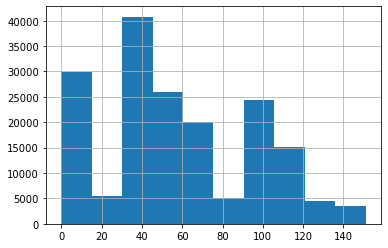

In [9]:
data['Скорость_ротора'].hist()

<AxesSubplot:>

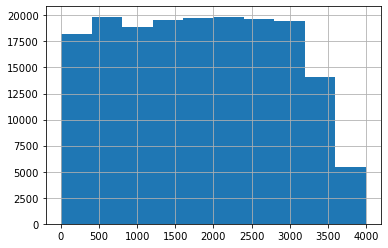

In [10]:
data['Глубина_м'].hist()

<AxesSubplot:>

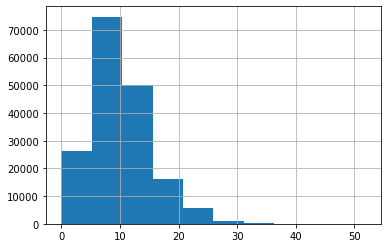

In [11]:
data['Нагрузка_на_долото_тонн'].hist()

<AxesSubplot:>

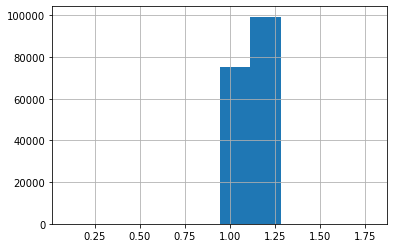

In [12]:
data['Плотность_на_входе_кг/м3'].hist()

<AxesSubplot:>

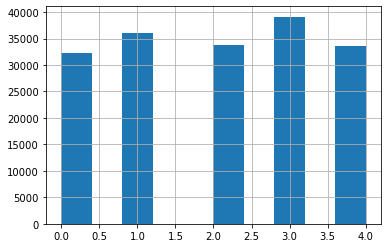

In [13]:
data['№_скважины'].hist()

<AxesSubplot:>

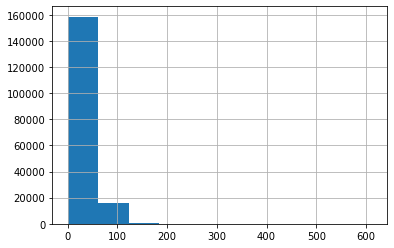

In [14]:
data['Ср_мех_скорость_м/ч'].hist()

In [15]:
len(data)

174830

### Код стратиграфии 622

In [16]:
data=data[data['Код_стратиграфии']==622]

In [17]:
#Сформируем датасет без кода стратиграфии
data=data.drop('Код_стратиграфии', axis=1)

In [18]:
data.head()

,Unnamed: 0,Глубина_м,Нагрузка_на_долото_тонн,Скорость_ротора,Плотность_на_входе_кг/м3,Расход_на_входе_литр/сек,Диам_скваж_мм,№_скважины,Ср_мех_скорость_м/ч
24752,24752,2546.0,8.0,62,1.02,16.9575,114,2,6.2069
24753,24753,2546.1,10.0,61,1.02,17.0572,114,2,12.8571
24754,24754,2546.2,11.0,61,1.02,17.0572,114,2,9.7297
24755,24755,2546.3,9.0,62,1.02,16.9575,114,2,5.3731
24756,24756,2546.4,10.0,61,1.02,16.9575,114,2,9.4737


In [19]:
y=data['Ср_мех_скорость_м/ч']
#X=data.iloc[:, 1:-1]

In [20]:
y.head()

24752     6.2069
24753    12.8571
24754     9.7297
24755     5.3731
24756     9.4737
Name: Ср_мех_скорость_м/ч, dtype: float64

In [21]:
#X.head()

In [22]:
data['№_скважины'].value_counts()

1    13095
3    10776
0     9945
4     9118
2     8972
Name: №_скважины, dtype: int64

In [23]:
data['Диам_скваж_мм'].value_counts()

114    51906
Name: Диам_скваж_мм, dtype: int64

<AxesSubplot:>

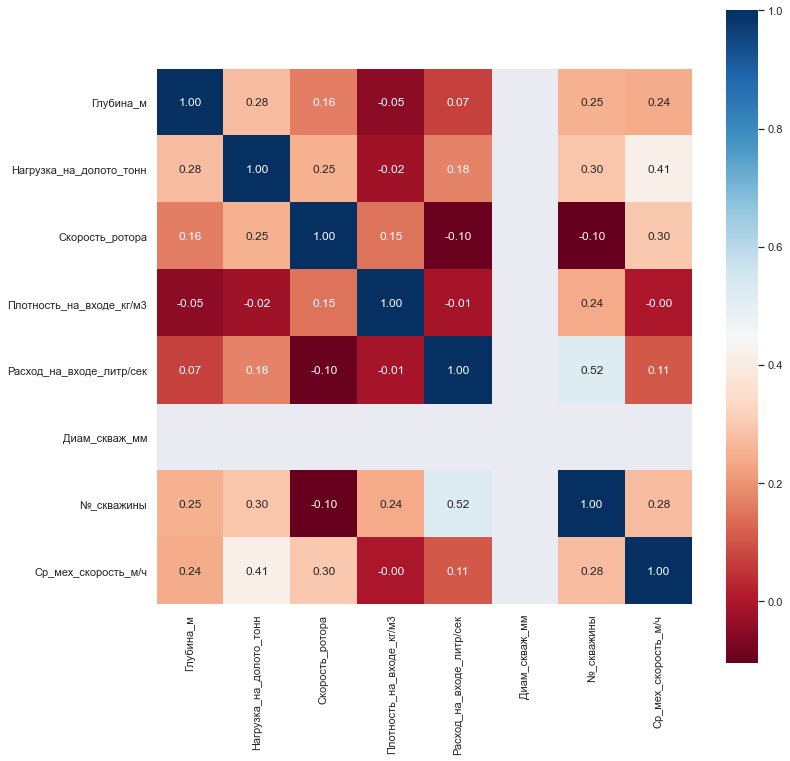

In [24]:
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(data.iloc[:, 1:].corr(), square=True,
              annot=True, fmt=".2f", linewidths=0., cmap="RdBu")


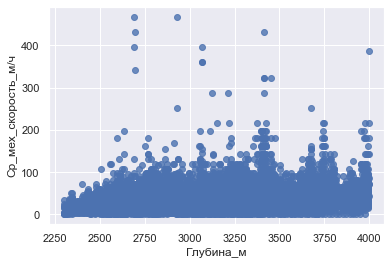

In [25]:
sns.regplot(x='Глубина_м', y='Ср_мех_скорость_м/ч', data=data, fit_reg=False)
plt.show()

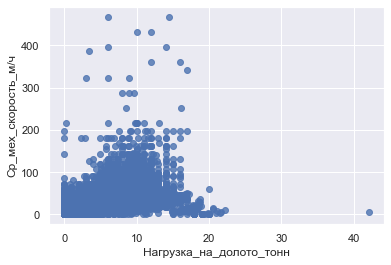

In [26]:
sns.regplot(x='Нагрузка_на_долото_тонн', y='Ср_мех_скорость_м/ч', data=data, fit_reg=False)
plt.show()

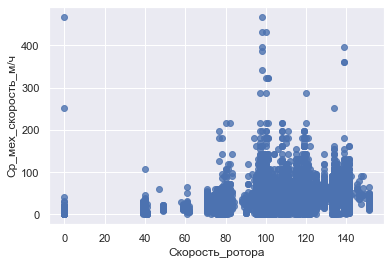

In [27]:
sns.regplot(x='Скорость_ротора', y='Ср_мех_скорость_м/ч', data=data, fit_reg=False)
plt.show()

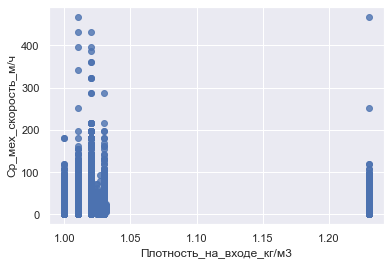

In [28]:
sns.regplot(x='Плотность_на_входе_кг/м3', y='Ср_мех_скорость_м/ч', data=data, fit_reg=False)
plt.show()

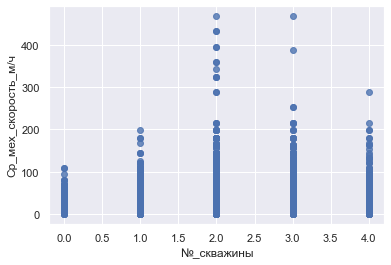

In [29]:
sns.regplot(x='№_скважины', y='Ср_мех_скорость_м/ч', data=data, fit_reg=False)
plt.show()

In [30]:
data=data.drop(['Расход_на_входе_литр/сек','Диам_скваж_мм'], axis = 1)
data.head()

,Unnamed: 0,Глубина_м,Нагрузка_на_долото_тонн,Скорость_ротора,Плотность_на_входе_кг/м3,№_скважины,Ср_мех_скорость_м/ч
24752,24752,2546.0,8.0,62,1.02,2,6.2069
24753,24753,2546.1,10.0,61,1.02,2,12.8571
24754,24754,2546.2,11.0,61,1.02,2,9.7297
24755,24755,2546.3,9.0,62,1.02,2,5.3731
24756,24756,2546.4,10.0,61,1.02,2,9.4737


In [31]:
X=data.iloc[:, 1:-1]

<AxesSubplot:>

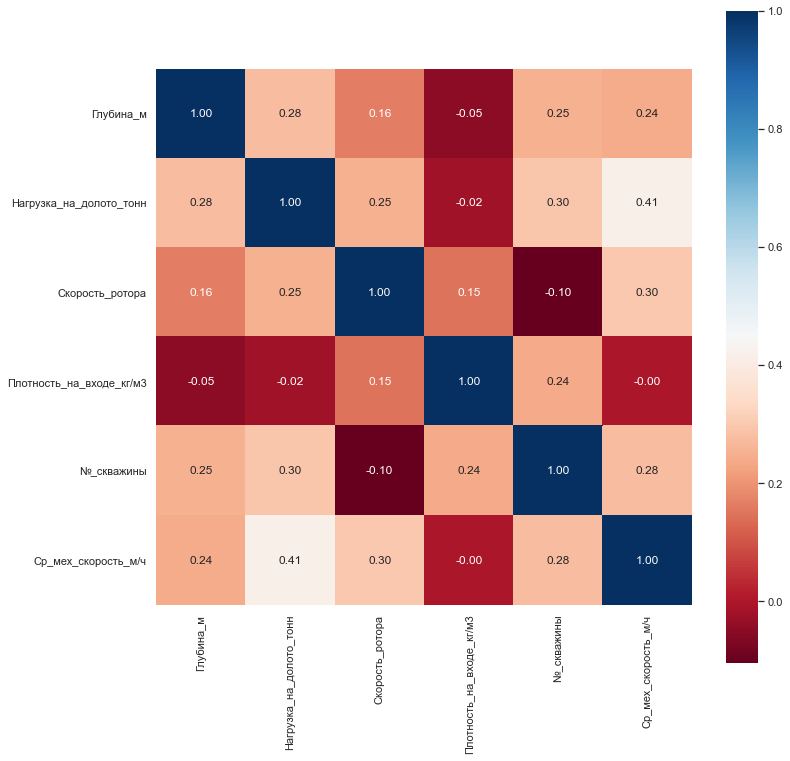

In [32]:
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(data.iloc[:, 1:].corr(), square=True,
              annot=True, fmt=".2f", linewidths=0., cmap="RdBu")


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
Model1=LinearRegression()
Model1.fit(X_train, y_train)
y_pred=Model1.predict(X_test)
y_pred;

In [34]:
print('MSE=', mean_squared_error(y_pred, y_test))
print('MAE=', mean_absolute_error(y_pred, y_test))
print ('R-squared=', Model1.score(X_train, y_train))

MSE= 249.7472013308813
MAE= 10.609750771394719
R-squared= 0.25637332529102486


##### Полиномы

In [35]:
data_sq=data*data
data_sq.head()

,Unnamed: 0,Глубина_м,Нагрузка_на_долото_тонн,Скорость_ротора,Плотность_на_входе_кг/м3,№_скважины,Ср_мех_скорость_м/ч
24752,612661504,6482116.00,64.0,3844,1.0404,4,38.525608
24753,612711009,6482625.21,100.0,3721,1.0404,4,165.305020
24754,612760516,6483134.44,121.0,3721,1.0404,4,94.667062
24755,612810025,6483643.69,81.0,3844,1.0404,4,28.870204
24756,612859536,6484152.96,100.0,3721,1.0404,4,89.750992


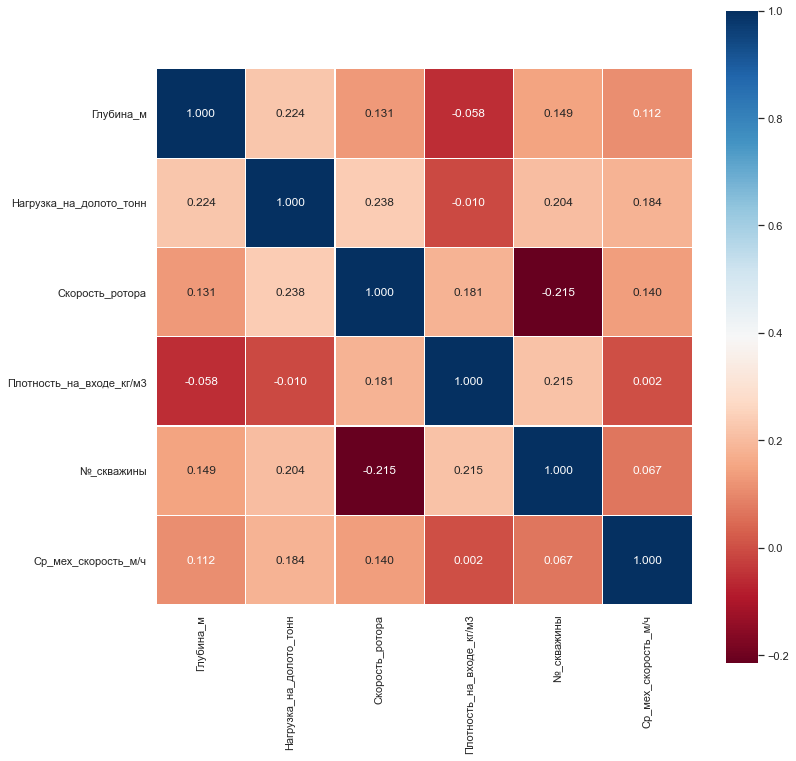

In [36]:
X=data_sq.iloc[:,1:-1]
y=data_sq['Ср_мех_скорость_м/ч']
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(pd.concat([X, y], axis=1).corr(), square=True,
              annot=True, fmt=".3f", linewidths=0.1, cmap="RdBu");

##### Логарифмы

In [37]:
data_log=np.log(data)
data_log.head()

,Unnamed: 0,Глубина_м,Нагрузка_на_долото_тонн,Скорость_ротора,Плотность_на_входе_кг/м3,№_скважины,Ср_мех_скорость_м/ч
24752,10.116662,7.842279,2.079442,4.127134,0.019803,0.693147,1.825662
24753,10.116702,7.842318,2.302585,4.110874,0.019803,0.693147,2.553896
24754,10.116742,7.842357,2.397895,4.110874,0.019803,0.693147,2.275183
24755,10.116783,7.842397,2.197225,4.127134,0.019803,0.693147,1.681405
24756,10.116823,7.842436,2.302585,4.110874,0.019803,0.693147,2.248520


In [38]:
X=data_log.iloc[:,1:-1]
X.head()

,Глубина_м,Нагрузка_на_долото_тонн,Скорость_ротора,Плотность_на_входе_кг/м3,№_скважины
24752,7.842279,2.079442,4.127134,0.019803,0.693147
24753,7.842318,2.302585,4.110874,0.019803,0.693147
24754,7.842357,2.397895,4.110874,0.019803,0.693147
24755,7.842397,2.197225,4.127134,0.019803,0.693147
24756,7.842436,2.302585,4.110874,0.019803,0.693147


In [39]:
y=data_log['Ср_мех_скорость_м/ч']

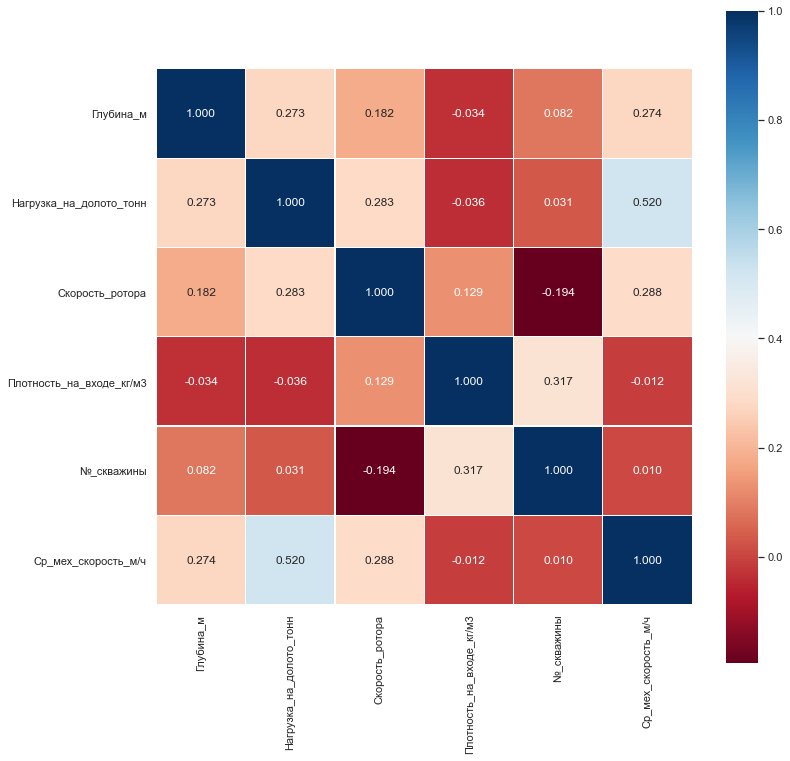

In [40]:
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(pd.concat([X, y], axis=1).corr(), square=True,
              annot=True, fmt=".3f", linewidths=0.1, cmap="RdBu");

In [41]:
##### Обрезаем датасет

In [42]:

data=data[data['Плотность_на_входе_кг/м3']<1.06]
data=data[data['Нагрузка_на_долото_тонн']<13]
data=data[data['Ср_мех_скорость_м/ч']<70]
data=data[data['Скорость_ротора']>95]
data=data[data['Скорость_ротора']<120]

In [43]:
len(data)

34849

<AxesSubplot:>

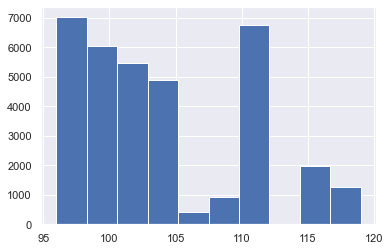

In [44]:
data['Скорость_ротора'].hist()

<AxesSubplot:>

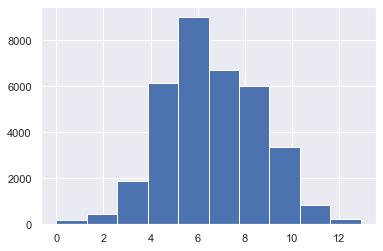

In [45]:
data['Нагрузка_на_долото_тонн'].hist()

<AxesSubplot:>

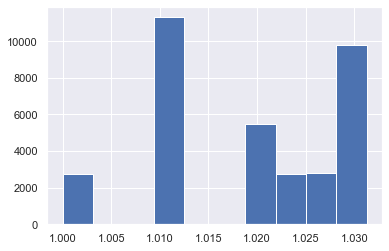

In [46]:
data['Плотность_на_входе_кг/м3'].hist()


<AxesSubplot:>

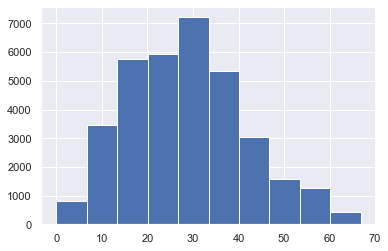

In [47]:
data['Ср_мех_скорость_м/ч'].hist()

In [48]:
data.columns

Index(['Unnamed: 0', 'Глубина_м', 'Нагрузка_на_долото_тонн', 'Скорость_ротора',
       'Плотность_на_входе_кг/м3', '№_скважины', 'Ср_мех_скорость_м/ч'],
      dtype='object')

In [49]:
y=data['Ср_мех_скорость_м/ч']
X=data.iloc[:, 1:-1]
X.head()

,Глубина_м,Нагрузка_на_долото_тонн,Скорость_ротора,Плотность_на_входе_кг/м3,№_скважины
24823,2553.10,2.0,119,1.03,2
24825,2553.30,2.0,119,1.01,2
24826,2553.41,2.0,119,1.01,2
24827,2553.50,2.0,119,1.01,2
24828,2553.60,2.0,119,1.01,2


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
Model2=LinearRegression()
Model2.fit(X_train, y_train)
y_pred=Model2.predict(X_test)
y_pred;

In [51]:
print('MSE=', mean_squared_error(y_pred, y_test))
print('MAE=', mean_absolute_error(y_pred, y_test))
print ('R-squared=', Model1.score(X_train, y_train))

MSE= 113.25675832273495
MAE= 8.296605666191033
R-squared= 0.3277097918677604


In [52]:
X=data['Нагрузка_на_долото_тонн']
y=data['Ср_мех_скорость_м/ч']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train=X_train.values.reshape(-1, 1)
X_test=X_test.values.reshape(-1, 1)
Model1=LinearRegression()
Model1.fit(X_train, y_train)
y_pred=Model1.predict(X_test)
print('MSE=', mean_squared_error(y_pred, y_test))
print('MAE=', mean_absolute_error(y_pred, y_test))
print ('R-squared=', Model1.score(X_train, y_train))
y_pred;

MSE= 132.66622287097326
MAE= 9.1160951222506
R-squared= 0.26355160426833835
